In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
#customer_id will be the index
df = pd.DataFrame(df)
df = df.set_index('CustomerID')

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [ ]:
#Check if there is any missing data
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


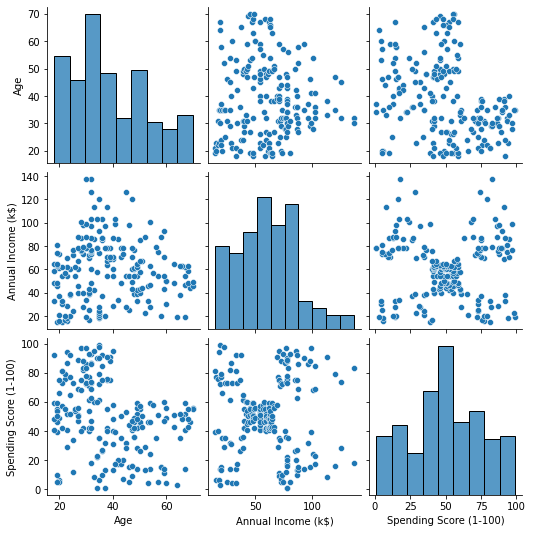

In [ ]:
#Exploratory data analysis
sns.pairplot(df)

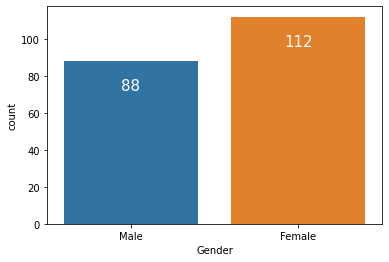

In [ ]:
#Create a countplot to display the number of each gender categories
ax=sns.countplot(x='Gender', data=df);
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=15)

In [ ]:
#To make it easier to create more plots, added a dummy variable in the dataset
df_new = pd.concat([df, pd.get_dummies(df['Gender'])], axis=1)
df_new.head()
#Create a scatterplot to mapout the relationship between age and annual income

,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
CustomerID,,,,,,
1,Male,19,15,39,0,1
2,Male,21,15,81,0,1
3,Female,20,16,6,1,0
4,Female,23,16,77,1,0
5,Female,31,17,40,1,0


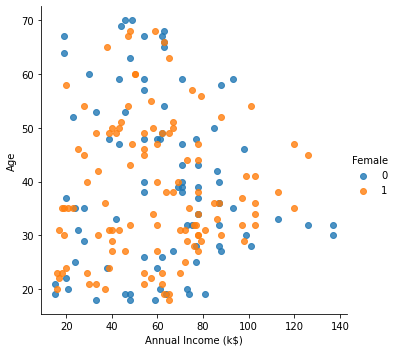

In [ ]:
#create a scatterplot to mapout the relationship between age and annual income
sns.lmplot(x='Annual Income (k$)', y='Age', data=df_new, hue='Female', fit_reg = False)

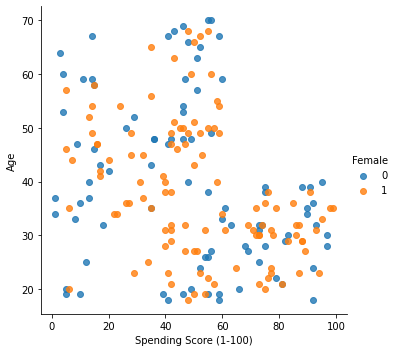

In [ ]:
#create a scatterplot to mapout the relationship between age and spending score
sns.lmplot(x='Spending Score (1-100)', y='Age', data=df_new, hue='Female', fit_reg = False)

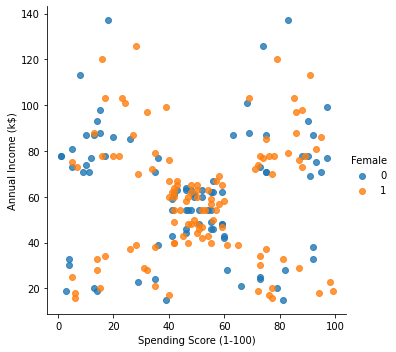

In [ ]:
sns.lmplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df_new, hue='Female', fit_reg = False)

In [ ]:
#From this scatterplot and the pairplot, there seems to be five clusters. I then ran a elbow method to see what a optimal number for k was.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sample = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

In [ ]:
def k_number(sample, n):
  k_num = []
  inertia=[]
  for k in range(1, n):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(sample)
    inertia.append(kmeans.inertia_)
    k_num.append(k)

  plt.plot(k_num, inertia, 'o-')
  plt.xlabel('Number of k')
  plt.ylabel('inertia')

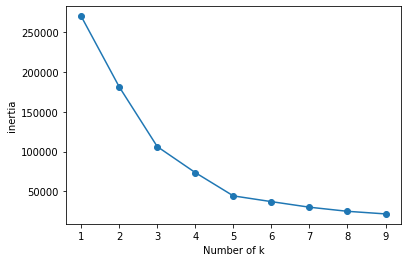

In [ ]:
k_number(sample, 10)

In [ ]:
#From the elbow method graph, I confirmed my assumption and decided to use k=5 as the number of cluster to preform kmeans clustering analysis

In [ ]:
model = KMeans(n_clusters=5).fit(sample)
model = model.fit_predict(sample)